## Gradient Descent Implementation 

This is the code from [Bogotobogo](http://www.bogotobogo.com/python/python_numpy_batch_gradient_descent_algorithm.php) to practice the usage

In [17]:
import numpy as np
import random
import sklearn
import pylab
from scipy import stats
from sklearn.datasets.samples_generator import make_regression

In [18]:
def gradient_descent1(alpha, x, y, ep=0.0001, max_iter=10000):
    converged = False
    iteration = 0
    m = x.shape[0] # Number of samples
    
    # Initialize the theta
    t0 = np.random.random(x.shape[1])
    t1 = np.random.random(x.shape[1])
    
    # Total error, J(theta)
    J = sum([(t0 + t1*x[i] - y[i]) ** 2 for i in range(m)])
    
    # Iterate Loop
    while not converged:
        # For each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i] for i in range(m))])
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) * x[i] for i in range(m)])
        
        # Update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
        
        # Update theta
        t0 = temp0
        t1 = temp1
        
        # Mean squared error
        e = sum( [ (t0 + t1*x[i] - y[i])**2  for i in range(m)] )
        
        if abs(J - e) <= ep:
            print("Converged, iterations: " + str(iterations) + "!!!")
            converged = True
        
        J = e # Update error
        iteration += 1
        
        if iteration == max_iter:
            print('Max interactions exceeded!')
            converged = True
            
    return t0, t1

In [19]:
def main1():
    x, y = make_regression(n_samples=100, n_features=1, n_informative=1,
                          random_state=0, noise=35)
    print('x.shape = %s y.shape = %s' %(x.shape, y.shape))
    
    alpha = 0.01 # Learning rate
    ep = 0.01 # Convergence criteria
    
    # Call gradient decent, and get intercept(=theta0)  and slope(=theta1)
    theta0, theta1 = gradient_descent1(alpha, x, y, ep, max_iter=1000)
    print(('theta0 = %s theta1 = %s') %(theta0, theta1))
    
    # Check with scipy linear regression
    slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
    print(('intercept = %s slope = %s') %(intercept, slope))
    
    # Plot
    for i in range(x.shape[0]):
        y_predict = theta0 + theta1 * x
        
    pylab.plot(x,y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print("Done!")
    

In [20]:
def gradient_descent2(alpha, x, y, numIterations):
    m = x.shape[0] # Number of samples
    theta = np.ones(2)
    x_transpose = x.transpose()
    for i in range(0, numIterations):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        J = np.sum(loss ** 2) / (2 * m) # Cost 
        print("iter %s | J: %.3f" % (iter, J) )
        
        gradient = np.dot(x_transpose, loss) / m
        theta = theta - alpha * gradient # Update 
    
    return theta

In [22]:
def main2():
    x, y = make_regression(n_samples=100, n_features=1,
                          n_informative=1, random_state=0,
                          noise=35)
    m, n = np.shape(x)
    x = np.c_[ np.ones(m), x] # Insert column
    alpha = 0.01 # learning rate
    theta = gradient_descent2(alpha, x, y, 1000)
    
    # plot
    for i in range(x.shape[1]):
        y_predict = theta[0] + theta[1]*x 
    pylab.plot(x[:,1],y,'o')
    pylab.plot(x,y_predict,'k-')
    pylab.show()
    print "Done!"

iter <built-in function iter> | J: 1604.873
iter <built-in function iter> | J: 1586.636
iter <built-in function iter> | J: 1568.768
iter <built-in function iter> | J: 1551.261
iter <built-in function iter> | J: 1534.107
iter <built-in function iter> | J: 1517.301
iter <built-in function iter> | J: 1500.833
iter <built-in function iter> | J: 1484.699
iter <built-in function iter> | J: 1468.890
iter <built-in function iter> | J: 1453.401
iter <built-in function iter> | J: 1438.224
iter <built-in function iter> | J: 1423.354
iter <built-in function iter> | J: 1408.785
iter <built-in function iter> | J: 1394.509
iter <built-in function iter> | J: 1380.522
iter <built-in function iter> | J: 1366.817
iter <built-in function iter> | J: 1353.389
iter <built-in function iter> | J: 1340.232
iter <built-in function iter> | J: 1327.341
iter <built-in function iter> | J: 1314.710
iter <built-in function iter> | J: 1302.334
iter <built-in function iter> | J: 1290.207
iter <built-in function iter> | 

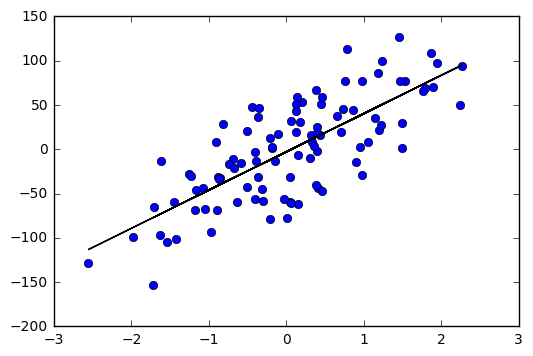

Done!


In [24]:
main2()